In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data = pd.read_csv('water.csv')
data.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


1. Связь между жесткостью воды и среднегодовой смертностью очень слабая, так как на основании предоставленных данных только в  50% случаев изменение значений жесткости воды ведет к изменению значений смертности.
2. Если рассматривать южные и северные штаты по отдельности, то видно, что в южных шатах присутствует очень слабая обратная связь, а в северных шатах связь отсутвует.

# Корреляция

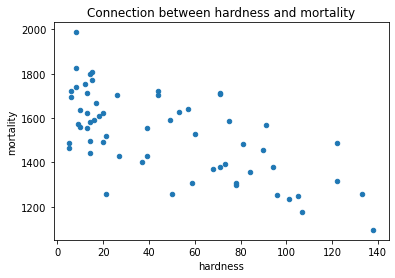

In [13]:
# Взаимосвязь между жесткостью воды и среднегодовой смертностью
data.plot(kind='scatter', x='hardness', y='mortality', title = 'Сonnection between hardness and mortality')

Диаграмма показывает, что присутствует обратная взаимосвязь между значениями жесткости воды и смертности.

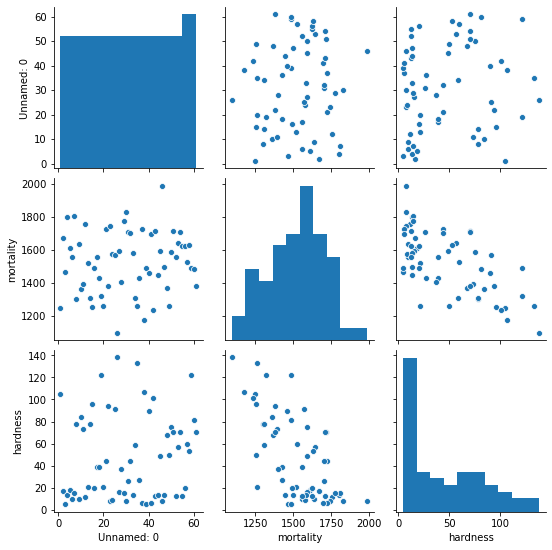

In [14]:
sns.pairplot(data)

In [15]:
 #ККоэффициенты корреляции
k_spearman = data[['hardness', 'mortality']].corr(method='spearman').iloc[0,1]
k_kendall = data[['hardness', 'mortality']].corr(method='kendall').iloc[0,1]
k_pearson = data[['hardness', 'mortality']].corr().iloc[0,1]
print(f'Spearman correlation = {k_spearman},\nKendall correlation = {k_kendall},\nPearson correlation = {k_pearson}') 

Spearman correlation = -0.6316646189166502,
Kendall correlation = -0.4537528176782981,
Pearson correlation = -0.6548486232042464


In [17]:
Коэффициенты корреляции показывают отрицательные значения -  это означает, что 
при увеличении жесткости воды, уменьшается среднегодовая смертность.

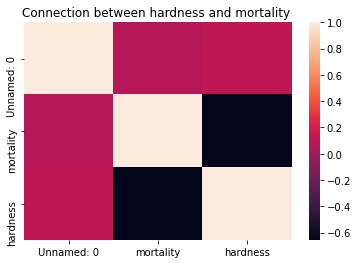

In [18]:
ax = plt.axes()
sns.heatmap(data.corr())
ax.set_title('Сonnection between hardness and mortality ')
plt.show()

# Регрессия

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [39]:
X = data[['hardness']]  #на основне жесткости воды
y = data['mortality']    #прогназируем смертность

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
X_train.shape

(42, 1)

In [63]:
y_train.shape   

(42,)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
print(f'model.intercept: {model.intercept_}')
print(f'model.coef: {model.coef_}')
print('Это означает,что на каждую единицу изменения жесткости воды\nизменение смерности уменьшается на около -3 единицы измерения.')

model.intercept: 1668.9722977277095
model.coef: [-3.13167087]
Это означает,что на каждую единицу изменения жесткости воды
изменение смерности уменьшается на около -3 единицы измерения.


In [74]:
print(f'determination coef test: {model.score(X_test, y_test)}')
print('Точность подбора модели приемлемая,\nэто значит, что в 50% случаев изменение значений жесткости воды\nприводят к изменению значений смертности')

determination coef test: 0.5046490611017092
Точность подбора модели приемлемая,
это значит, что в 50% случаев изменение значений жесткости воды
приводят к изменению значений смертности


In [67]:
y_pred = model.predict(X_test) #прогноз x
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

Eсть сильные отклонения от нашего условного прогноза


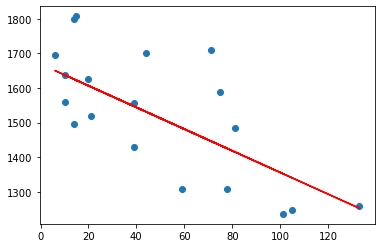

In [85]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
print('Eсть сильные отклонения от нашего условного прогноза')

# Анализ остатков

In [100]:
residuals = y_pred - y_test

Остатки сильно разбросаны, можно заключить, что модель достаточно адекватно описывает данные


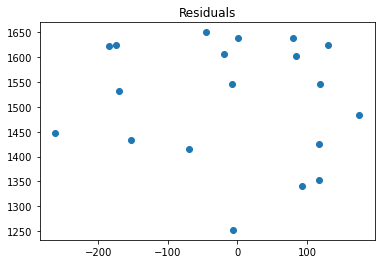

In [101]:
plt.scatter(residuals, y_pred)
plt.title('Residuals')
print('Остатки сильно разбросаны, можно заключить, что модель достаточно адекватно описывает данные')

Text(0.5, 1.0, 'Residuals')

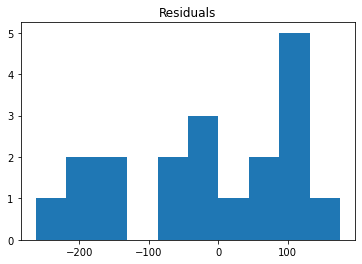

In [104]:
plt.hist(residuals)
plt.title('Residuals')

# Задание 2

In [151]:
d_south = data.loc[data['location'].isin(['South'])]

In [152]:
d_north = data.loc[data['location'].isin(['North'])]

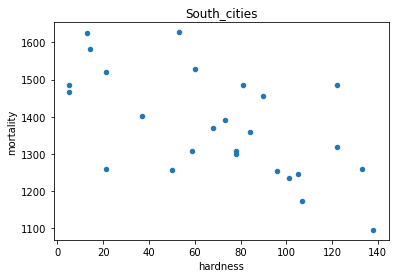

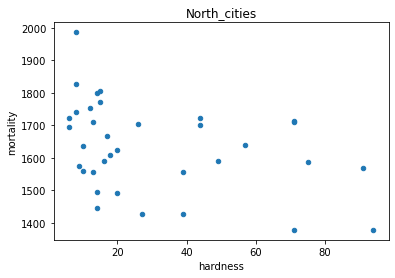

In [153]:
d_south.plot(kind='scatter', x='hardness', y='mortality', title = 'South_cities')
plt.show()
d_north.plot(kind='scatter', x='hardness', y='mortality', title = 'North_cities')
plt.show()

In [154]:
#Коэф. корреляции Пирсена
pearson_south = d_south.corr().iloc[0,1]
pearson_north = d_north.corr().iloc[0,1]
print(f'Pearson correlation\nSouth_cities = {pearson_south},\nNorth_cities = {pearson_north}') 

Pearson correlation
South_cities = 0.39633320182876,
North_cities = -0.10354815833046693


In [155]:
#Коэф. корреляции Кенделла
kendall_south = d_south[['hardness', 'mortality']].corr(method='kendall').iloc[0,1]
kendall_north = d_north[['hardness', 'mortality']].corr(method='kendall').iloc[0,1]
print(f'Kendall correlation\nSouth_cities = {kendall_south},\nNorth_cities = {kendall_north}') 

Kendall correlation
South_cities = -0.4403148402800253,
North_cities = -0.2830580977201083


In [156]:
 #Коэф. корреляции Спирмена
spearman_south = d_south[['hardness', 'mortality']].corr(method='spearman').iloc[0,1]
spearman_north = d_north[['hardness', 'mortality']].corr(method='spearman').iloc[0,1]
print(f'Spearman correlation\nSouth_cities = {spearman_south},\nNorth_cities = {spearman_north}') 

Spearman correlation
South_cities = -0.5957229185013566,
North_cities = -0.4042078956511175


Коэффициенты корреляции в разных группах штатов отрицательная. 
Но в южных штанах связь в 2 раза сильнее чем в северных

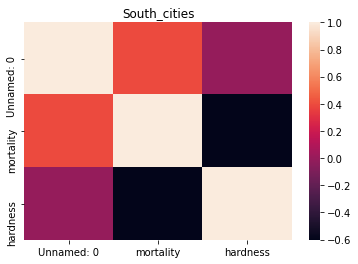

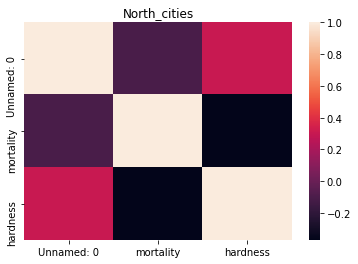

In [157]:
ax = plt.axes()
sns.heatmap(d_south.corr())
ax.set_title('South_cities')
plt.show()
ax = plt.axes()
sns.heatmap(d_north.corr())
ax.set_title('North_cities')
plt.show()

Регрессия для южныных штатов

In [277]:
x = d_south[['hardness']]  #на основне жесткости воды
y = d_south['mortality']    #прогназируем смертность

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [279]:
x_train.shape

(18, 1)

In [280]:
y_train.shape

(18,)

In [281]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [282]:
print(f'model.intercept south: {model.intercept_}')
print(f'model.coef south: {model.coef_}')
print('Значение коэффициента очень близко к значению коэффициента в общей регрессии')

model.intercept south: 1640.2204603423374
model.coef south: [-3.51342921]
Значение коэффициента очень близко к значению коэффициента в общей регрессии


In [283]:
print(f'determination coef test south: {model.score(x_test, y_test)}')
print('Коэффициент детерминации отрицательный, это означает, что модель бесполезна')

determination coef test south: -2.5519223012352077
Коэффициент детерминации отрицательный, это означает, что модель бесполезна


In [284]:
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Model south')

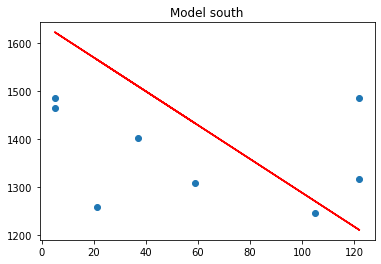

In [285]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.title('Model south')

Text(0.5, 1.0, 'Residuals south')

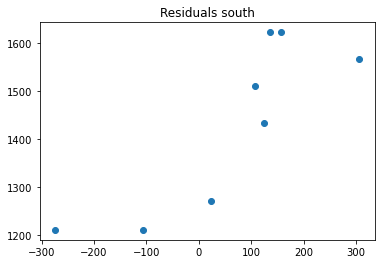

In [258]:
residuals = y_pred - y_test
plt.scatter(residuals,y_pred)
plt.title('Residuals south')

Для северных городов

In [259]:
X = d_north[['hardness']] 
y = d_north['mortality']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [261]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [262]:
print(f'model.intercept north: {model.intercept_}')
print(f'model.coef north: {model.coef_}')
print('Значение отризательного коэффициента в 1,5 раза больше, чем в общей регрессии')

model.intercept north: 1688.150229031281
model.coef north: [-1.97686226]
Значение отризательного коэффициента в 1,5 раза больше, чем в общей регрессии


In [269]:
print(f'determination coef test south: {model.score(X_test, y_test)}')
print('Коэффициент детерминации близок к 0, это означает, что связь между переменными регрессионной модели отсутствует')

determination coef test south: 0.018885304285745863
Коэффициент детерминации близок к 0, это означает, что связь между переменными регрессионной модели отсутствует


In [270]:
y_pred = model1.predict(X_test) #прогноз x
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

Text(0.5, 1.0, 'Model north')

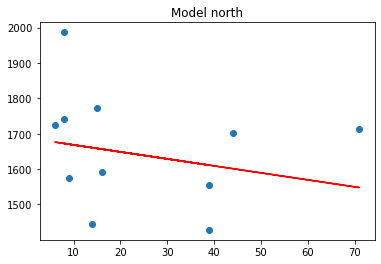

In [275]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('Model north')

Text(0.5, 1.0, 'Residuals north')

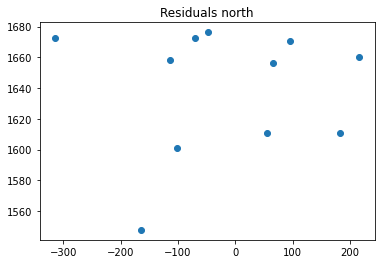

In [274]:
residuals = y_pred - y_test
plt.scatter(residuals,y_pred)
plt.title('Residuals north')